## Apply a Multinomial Logistic Classifier trained on MNIST to recognize my Own Handwritten Digits

This notebook applies a classifier that I pre-trained on MNIST to actual photos taken with my iphone of my own hand-written digits.

The photos have been preprocesses and scaled down to 28x28 pixel images using the Python Image Library (PIL) and Numpy. Al the preprocessing was don in the previous notebook: 03_prep_own_hand.ipynb

The goal of this exercise is not to experiment with advanced image processing architectures, but rather to implement a simple but realistic image processing pipeline, where the image data is not clean and needs to be preprocessed in order for the classifier to work.

The classifier is as simple as it can be, but since the images are heavily preprocessed until they are almost linearly-separable, this notebook can achieve above 90% accuracy with a simple linear classifier.

A more advanced model based on a CNN architecture is implemented in a separate notebook.

Inputs:
 - Data: preprocessed photos of hand-written digits stored in a local folder (the file name is the true label)
 - Model Coefficients: tensors W and b trained on MNIST by a previous Notebook and saved to a file.

Prediction Steps:<br>
 - Load the preprocessed data
 - Read the model coefficients
 - Apply classifier to predict the label
 - Compute accuracy


Outputs:
 - Accuracy: quality of fit of the model over all the test set.
 - Images where the classifier makes a mistake (predicts the wrong label)

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

datapath = 'own_hand_data/'

/home/adrian/anaconda2/envs/deep/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def show_image(image):
    #image = observation[0].reshape(28, 28)
    #print observation[0].shape, image.shape    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=matplotlib.cm.Greys)

In [3]:
def show_obs(observation):
    image = observation[0].reshape(28, 28)
    #print observation[0].shape, image.shape    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=matplotlib.cm.Greys)

### Load Pre-processed images 

In [4]:
from PIL import Image
from PIL import ImageOps

def get_image(filepath):
    """
    Image can be in gif jpeg or png format.
    """
    with Image.open(filepath) as im:
        pixel_values = np.asarray(im)
        
    image = Image.fromarray(pixel_values)
    return image

True Label:  6 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


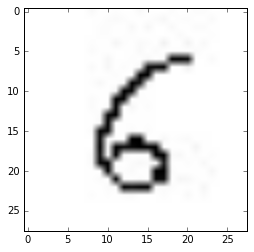

In [5]:
import os
import re


def encode_1h(x):
    encoding = np.zeros((10))
    encoding[x] = 1
    return encoding

def decode_1h(encoding):
    return np.argmax(encoding)


def get_filenames(path, pattern):
    filenames = []
    for f in os.listdir(path):
        if re.search(pattern, f):
            #print 'x', f
            filenames.append(f)
    return filenames


def get_images(datapath):
    images = {}
    labels = {}

    for fn in get_filenames(datapath, '^pp_\d\.[JPG|jpg]'):
        dig = fn.split('_')[1]
        dig = int(dig.split('.')[0])
        #print int(dig)
        images[dig] = get_image(datapath+fn)
        labels[dig] = encode_1h(dig)
    
    return images, labels

images, labels = get_images(datapath)

d = 6
im0 = np.asarray(images[d])
l0 = labels[d]
print "True Label: ", decode_1h(l0), l0
show_image(im0)

### Model Definition
The model is a multinomial logistic classifier, a simple linear matrix multiply with a softmax.
In this notebook we only need the prediction part of the model, so there is no need to define a loss function.

In [6]:
import tensorflow as tf

# Declare tensors to hold the model coefficients
W = tf.Variable(tf.zeros([784, 10]), name="W")
b = tf.Variable(tf.zeros([10]), name="b")

# Define the prediction formulas
x = tf.placeholder(tf.float32, [None, 784])
scores = tf.matmul(x, W) + b
y = tf.nn.softmax(scores)

#### Restore previously trained coefficients  and predict a randomly chosen digit from the test set
 - Restore all of session's variabls (tensors) back to a previous checkpoint.

In [7]:
def restore_model(sess, modelpath):
    saver = tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state(modelpath)
    if ckpt and ckpt.model_checkpoint_path:
      # Restores from checkpoint
      saver.restore(sess, ckpt.model_checkpoint_path)
      print "Model loaded"
    else:
      print "No checkpoint file found"

In [8]:
modelpath = "model/train/"

In [9]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
restore_model(sess, modelpath)
print sess.run(b), sum(sess.run(W))

Model loaded
[-1.15206826  1.20563388  0.15659064 -0.62410241  0.10929595  2.32020307
 -0.5199756   1.37453711 -2.41191363 -0.45817113] [ -5.64645815 -56.03163528  34.48942184  40.59013367 -45.9594574
  32.8130188   -1.99630558 -12.38753128  25.1139679  -10.9790802 ]


#### Predict a digit from the test set
 - Randomply pick an image from the dataset and predict its label
 - Repeat until the classifier makes a mistake
 - Show labels and test image for the first classification error found

True Label     : 0
Predicted Label: 0 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 0.144021

True Label     : 1
Predicted Label: 3 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 5.24128

True Label     : 2
Predicted Label: 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 0.735638

True Label     : 3
Predicted Label: 3 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 0.0495215

True Label     : 4
Predicted Label: 5 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 1.28455

True Label     : 5
Predicted Label: 5 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 0.148877

True Label     : 6
Predicted Label: 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 0.750022

True Label     : 7
Predicted Label: 0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Cross Entropy: 1.38983

True Label     : 8
Predicted Label: 5 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
C

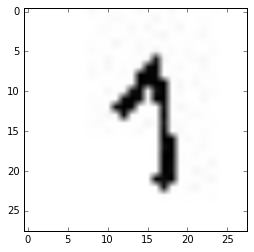

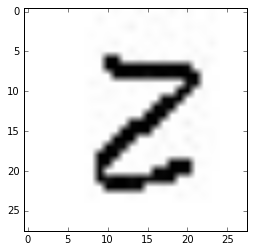

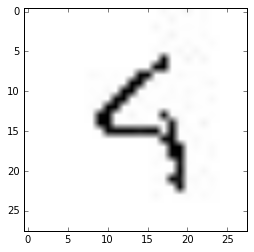

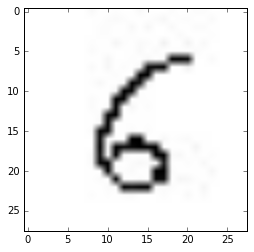

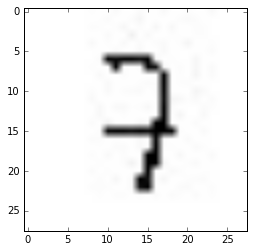

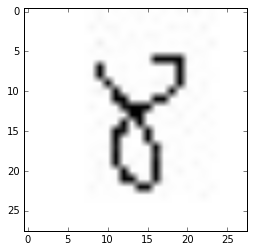

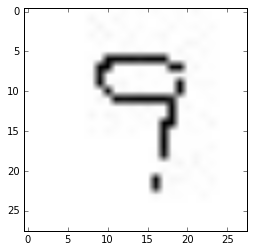

In [10]:
# Define a quality metric to be applied to the predictions 
y_ = tf.placeholder(tf.float32, [None, 10])      # true label
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))


# classiy a set of digits
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for dig in digits:

    # get oneof my own hand-written image and its true label
    image = images[dig]
    label = labels[dig]

    """
    Our custom hand-writing is stored as 28x28 pixel images, each pixel is a number in the [0-255] range.
    The classifier was trained with flatten images (a one dimensional vector of 784 pixels) with
    pixel values normalized in the [0-1] range.
    """ 
    #print image.size
    flatten_image = np.asarray(image).reshape((1, 784)) / 255.0

    pred_label = sess.run(y, feed_dict={x: flatten_image})[0]
    pred_label = map(round, pred_label)
    pred_dig = decode_1h(pred_label)
    
    print "True Label     : %d" % dig
    print "Predicted Label: %d" % pred_dig, pred_label
    if pred_dig != dig:
        show_image(image)
    #    print "Scores:", ["%0.2f" % s for s in sess.run(scores, feed_dict={x: flatten_image})[0]]
    print "Cross Entropy:",  sess.run(cross_entropy, feed_dict={y_: [label], x: flatten_image})
    print


In [11]:
sess.close()